In [1]:
from HC import Profile

profile = Profile()
v_data = profile.read_voltage_profile()
p_data = profile.read_load_profile()


Write `.Json` loadshape files for each costumer

In [2]:
ckt = profile.set_daily_Edemand()
typical_curves = profile.set_curve_name_file()
profile.write_json(ckt, "./daily.json")
profile.write_json(typical_curves, "./edemand.json")

### Sensitivity Analisys

In [17]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

# TxID = "TRA24198"    # Group 1 (missing one meter)
# TxID = "TRA1624"       # Group 3
TxID = "TRA21089"    # Group 2

loads = profile.call_loads()
Txs = profile._loads["Transformador"]
ind = [n for (n, T) in enumerate(Txs) if T == TxID]
metersID = [profile._loads["Medidor"][m] for m in ind]


In [18]:
len(metersID)

26

In [52]:
Txs[profile._loads["Medidor"].index("ME244896")]

'TRA1624'

One arbitrary costumer `ME244896` connected to transformer `TRA1624`

In [5]:
# m = "ME244896"
# profiles = profile.sort_profile()
# Vs = [v for v in profiles[m]["Voltage"]]
# Ps = [p for p in profiles[m]["Active"]]

# Ps = np.array(Ps)
# Vs = np.array(Vs) / 240
# reg = stats.linregress(Ps, Vs)
# b = reg.intercept
# m = reg.slope
# p = np.linspace(-7, 5, 100)
# plt.figure(figsize=(8, 2))
# plt.plot(Ps, Vs, 'o')
# plt.plot(p, m*p + b, "orange")
# plt.plot(-5.5005005005005, 1.0499420994949833, "o")
# # plt.title('H.C. Vmax')
# plt.xlabel('[kW]')
# plt.ylabel('[Vpu]')
# plt.legend(["V",
#             "linear fit",
#             "(-5.5, 1.05)"])
# # plt.savefig("ME244896.pdf")
# plt.show()


In [6]:
# p = np.linspace(-7, 0, 1000)
# b = reg.intercept
# m = reg.slope

# y = lambda x: m*x + b
# v = list(map(y, p))
# for n, V in enumerate(v):
#     if 1.0499 < V < 1.05:
#         print(V, p[n])
#     # if 0.95 < V < 0.9501:
#     #     print(V, p[n])


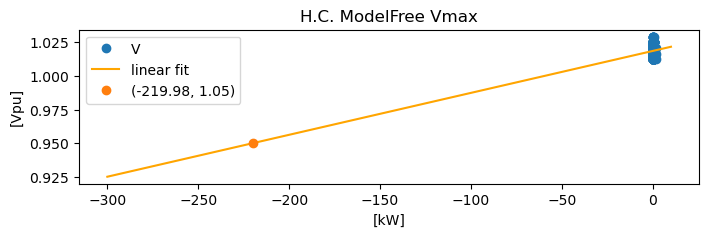

In [16]:
VPmax = profile.daily_Vmax(min_samples=85)
Pmax = []
Vmax = []
oddmeters = []
for m in metersID:
    if m in VPmax:
        Pmax += VPmax[m]["Pmax"]
        Vmax += VPmax[m]["Vmax"]
    else:
        oddmeters.append(m)

Pmax = np.array(Pmax)
Vmax = np.array(Vmax) / 240       # p.u.
reg = stats.linregress(Pmax, Vmax)
b = reg.intercept
m = reg.slope
p = np.linspace(-300, 10, 100)
plt.figure(figsize=(8, 2))
plt.plot(Pmax, Vmax, 'o')
plt.plot(p, m*p + b, "orange")
plt.plot(-219.98199819982, 0.9500167128824086, "o")

plt.title('H.C. ModelFree Vmax')
plt.xlabel('[kW]')
plt.ylabel('[Vpu]')
plt.legend(["V",
            "linear fit",
            "(-219.98, 1.05)"])
plt.savefig("regfullG3.pdf")
plt.show()

In [15]:
p = np.linspace(-400, 200, 10000)

y = lambda x: m*x + b
v = list(map(y, p))
for n, V in enumerate(v):
    # if 1.0499 < V < 1.05:
    #     print(V, p[n])
    if 0.95 < V < 0.9501:
        print(V, p[n])

0.9500167128824086 -219.98199819982
0.9500354188876157 -219.92199219921991
0.9500541248928226 -219.86198619861986
0.9500728308980295 -219.8019801980198
0.9500915369032366 -219.74197419741975


Full sensitivity analisys

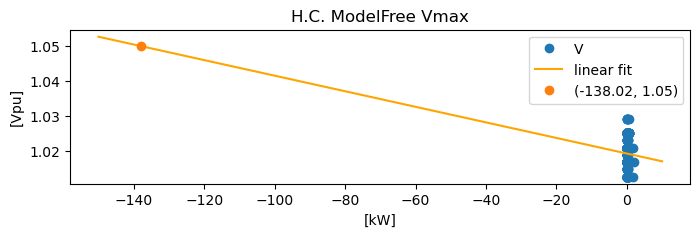

In [4]:
# Get max data
Vmax_P = profile.full_daily_Vmax()
m_labels = profile.rename_meter()
meters_i = [m_labels[m] for m in metersID]
Pmax = []
for meter in meters_i:
    if meter in Vmax_P:
        Pmax += Vmax_P[meter]["Pmax"]
    else:
        print(f"NoPowerProfile: {meter}")
        continue

Vmax = []
for meter in meters_i:
    if meter in Vmax_P:
        Vmax += Vmax_P[meter]["Vmax"]
    else:
        print(f"NoVoltageProfile: {meter}")
        continue

Pmax = np.array(Pmax)
Vmax = np.array(Vmax) / 240       # p.u.
reg = stats.linregress(Pmax, Vmax)
b = reg.intercept
m = reg.slope
p = np.linspace(-150, 10, 100)
plt.figure(figsize=(8, 2))
plt.plot(Pmax, Vmax, 'o')
plt.plot(p, m*p + b, "orange")
plt.plot(-138.015701570157, 1.0499521379808687, "o")
plt.title('H.C. ModelFree Vmax')
plt.xlabel('[kW]')
plt.ylabel('[Vpu]')
plt.legend(["V",
            "linear fit",
            "(-138.02, 1.05)"])
plt.savefig("regfull.pdf")
plt.show()


In [8]:
# p = np.linspace(-300, 1, 10000)
# b = reg.intercept
# m = reg.slope

# y = lambda x: m*x + b
# v = list(map(y, p))
# for n, V in enumerate(v):
#     if 1.0499 < V < 1.05:
#         print(V, p[n])
#     # if 0.95 < V < 0.9501:
#     #     print(V, p[n])


1.04999916708079 -138.22642264226423
1.049992448637944 -138.1963196319632
1.049985730195098 -138.16621662166216
1.0499790117522523 -138.13611361136114
1.0499722933094064 -138.1060106010601
1.0499655748665604 -138.07590759075907
1.0499588564237146 -138.04580458045805
1.0499521379808687 -138.015701570157
1.0499454195380227 -137.985598559856
1.0499387010951768 -137.95549554955497
1.049931982652331 -137.92539253925392
1.049925264209485 -137.8952895289529
1.0499185457666391 -137.86518651865185
1.0499118273237933 -137.83508350835083
1.0499051088809475 -137.80498049804982


Transformer ``TRA1624``

m = -0.00022318176085093898